In [1]:
import numpy as np
import pandas as pd

fifa_data = pd.read_csv('../datasets/fifa/fifa.csv')

names = fifa_data[['Name']]
stat_data = fifa_data.iloc[:, 54:-1]
stat_data_with_names = names.join(stat_data)

stat_data_with_names.head()



,Name,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [2]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer


my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('std_scaler', StandardScaler())])

X = my_pipeline.fit_transform(stat_data)
stat_data_scaling = pd.DataFrame(X, columns=stat_data.columns)
stat_data_scaling.head()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,1.868386,2.535912,1.019897,2.133101,2.438571,2.204353,2.494717,2.929601,2.239991,2.258177,...,1.686639,3.270519,-0.718478,-0.910469,-0.924788,-0.600753,-0.319329,-0.074758,-0.140427,-0.485802
1,1.868386,2.484629,2.114588,1.520010,2.495163,1.727782,1.841495,1.898391,1.586705,2.138158,...,2.324276,3.182959,-0.970018,-0.771803,-1.065895,-0.544165,-0.319329,-0.074758,-0.140427,-0.318493
2,1.595755,2.125646,0.558975,1.724373,2.325389,2.151401,2.222541,2.528575,1.652034,2.198168,...,2.069221,3.095399,-1.020326,-1.095356,-0.595539,-0.430989,-0.437784,-0.074758,-0.081644,-0.318493
3,-1.784872,-1.669318,-1.803251,-0.591750,-1.692589,-1.978882,-1.424612,-1.367106,-0.111838,-0.982317,...,-0.545090,0.818838,-1.624021,-1.234021,-1.536252,4.152658,4.063484,4.294004,4.209513,4.310377
4,2.359122,1.869229,0.155668,2.269344,2.212206,1.621877,2.059236,2.299417,2.501306,1.958131,...,1.941694,2.570039,1.042298,0.476184,0.251103,-0.091459,-0.200875,-0.681531,-0.375558,-0.206954


In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(stat_data_scaling)
y_kmeans = kmeans.predict(stat_data_scaling)
y_kmeans = pd.DataFrame(y_kmeans)

pos_kmeans = names.join(y_kmeans)
pos_kmeans.columns =['Name', 'cluster']
pos_kmeans.head(10)

,Name,cluster
0,L. Messi,3
1,Cristiano Ronaldo,3
2,Neymar Jr,3
3,De Gea,1
4,K. De Bruyne,3
5,E. Hazard,3
6,L. Modrić,3
7,L. Suárez,3
8,Sergio Ramos,3
9,J. Oblak,1


In [4]:
goalkeeper = pos_kmeans[pos_kmeans['cluster']==0].head(10)
striker = pos_kmeans[pos_kmeans['cluster']==1].head(10)
midfielder = pos_kmeans[pos_kmeans['cluster']==2].head(10)
defender = pos_kmeans[pos_kmeans['cluster']==3].head(10)
goalkeeper.style.hide_index()
striker.style.hide_index()
midfielder.style.hide_index()
defender.style.hide_index()

goalkeeper_styler = goalkeeper.style.set_table_attributes("style='display:inline'")
striker_styler = striker.style.set_table_attributes("style='display:inline'")
midfielder_styler = midfielder.style.set_table_attributes("style='display:inline'")
defender_styler = defender.style.set_table_attributes("style='display:inline'")

from IPython.display import display_html
display_html(goalkeeper_styler._repr_html_()+ "       " + striker_styler._repr_html_()+ "       " +
             midfielder_styler._repr_html_()+ "       " + defender_styler._repr_html_(), raw=True)

,Name,cluster
44,K. Koulibaly,0
73,M. Benatia,0
77,M. Škriniar,0
88,K. Manolas,0
110,D. Sánchez,0
111,J. Giménez,0
115,N. Süle,0
127,S. de Vrij,0
146,Sokratis,0
150,Raúl Albiol,0


In [5]:
copy = stat_data_scaling.copy()
from sklearn.metrics import silhouette_score
score = silhouette_score(copy, y_kmeans.values.ravel(), metric='euclidean')
score

0.2534258026325842

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
projected = pca.fit_transform(copy)

%matplotlib inline
import matplotlib.pyplot as plt


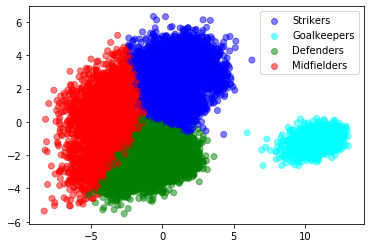

In [7]:
def colorize(l):
    result=[]
    for n in l:
        if n==0:
            result.append('blue')
        elif n==1:
            result.append('cyan')
        elif n==2:
            result.append('green')
        else:
            result.append('red')
    return result

plt.scatter(projected[:,0], projected[:,1],c=colorize(pos_kmeans['cluster']), alpha=0.5)

plt.scatter([], [], c='blue', label='Strikers', alpha=0.5)
plt.scatter([], [], c='cyan', label='Goalkeepers', alpha=0.5)
plt.scatter([], [], c='green', label='Defenders', alpha=0.5)
plt.scatter([], [], c='red', label='Midfielders', alpha=0.5)

plt.legend()

In [8]:
pace_list = ['Acceleration', 'SprintSpeed']
shooting_list = ['Positioning', 'Finishing', 'ShotPower', 'LongShots', 'Volleys','Penalties']
passing_list = ['Vision', 'Crossing', 'FKAccuracy', 'ShortPassing', 'LongPassing', 'Curve']
dribbling_list = ['Agility', 'Balance', 'Reactions', 'BallControl', 'Dribbling','Composure']
defense_list = ['Interceptions', 'HeadingAccuracy', 'Marking', 'StandingTackle', 'SlidingTackle']
physical_list = ['Jumping', 'Stamina', 'Strength', 'Aggression']
goalkeeping_list = ['GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
pace = stat_data[pace_list].mean(axis=1)
shooting = stat_data[shooting_list].mean(axis=1)
passing = stat_data[passing_list].mean(axis=1)
dribbling = stat_data[dribbling_list].mean(axis=1)
defense = stat_data[defense_list].mean(axis=1)
physical = stat_data[physical_list].mean(axis=1)
goalkeeping = stat_data[goalkeeping_list].mean(axis=1)

special_stat = pd.DataFrame()
special_stat['pace'] = pace
special_stat['shooting'] = shooting
special_stat['passing'] = passing
special_stat['dribbling'] = dribbling
special_stat['defense'] = defense
special_stat['physical'] = physical
special_stat['goalkeeping'] = goalkeeping

In [9]:
X = my_pipeline.fit_transform(special_stat)
special_stat_scaling = pd.DataFrame(X, columns=special_stat.columns)

k_means = KMeans(n_clusters=4)
k_means.fit(special_stat_scaling)
y_kmeans = pd.DataFrame(k_means.predict(special_stat_scaling))

pos_kmeans = names.join(y_kmeans)
pos_kmeans.columns =['Name', 'cluster']
goalkeeper = pos_kmeans[pos_kmeans['cluster']==0].head(10)
striker = pos_kmeans[pos_kmeans['cluster']==1].head(10)
midfielder = pos_kmeans[pos_kmeans['cluster']==2].head(10)
defender = pos_kmeans[pos_kmeans['cluster']==3].head(10)
goalkeeper.style.hide_index()
striker.style.hide_index()
midfielder.style.hide_index()
defender.style.hide_index()

goalkeeper_styler = goalkeeper.style.set_table_attributes("style='display:inline'")
striker_styler = striker.style.set_table_attributes("style='display:inline'")
midfielder_styler = midfielder.style.set_table_attributes("style='display:inline'")
defender_styler = defender.style.set_table_attributes("style='display:inline'")

from IPython.display import display_html
display_html(goalkeeper_styler._repr_html_()+ "       " + striker_styler._repr_html_()+ "       " +
             midfielder_styler._repr_html_()+ "       " + defender_styler._repr_html_(), raw=True)


,Name,cluster
0,L. Messi,0
1,Cristiano Ronaldo,0
2,Neymar Jr,0
4,K. De Bruyne,0
5,E. Hazard,0
6,L. Modrić,0
7,L. Suárez,0
8,Sergio Ramos,0
10,R. Lewandowski,0
11,T. Kroos,0


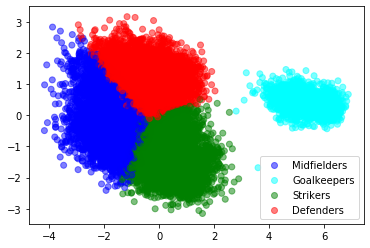

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
projected = pca.fit_transform(special_stat_scaling)

%matplotlib inline
import matplotlib.pyplot as plt

def colorize(l):
    result=[]
    for n in l:
        if n==0:
            result.append('blue')
        elif n==1:
            result.append('cyan')
        elif n==2:
            result.append('green')
        else:
            result.append('red')
    return result

plt.scatter(projected[:,0], projected[:,1],c=colorize(pos_kmeans['cluster']), alpha=0.5)

plt.scatter([], [], c='blue', label='Midfielders', alpha=0.5)
plt.scatter([], [], c='cyan', label='Goalkeepers', alpha=0.5)
plt.scatter([], [], c='green', label='Strikers', alpha=0.5)
plt.scatter([], [], c='red', label='Defenders', alpha=0.5)

plt.legend()

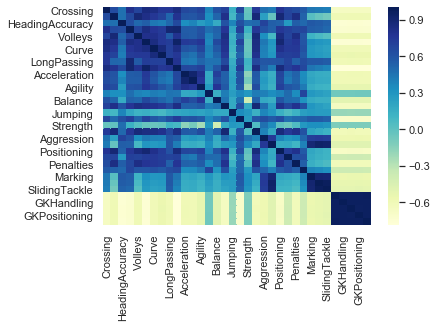

In [11]:
import seaborn as sns; sns.set()
corr_matrix = stat_data.corr()
sns.heatmap(corr_matrix,cmap="YlGnBu")

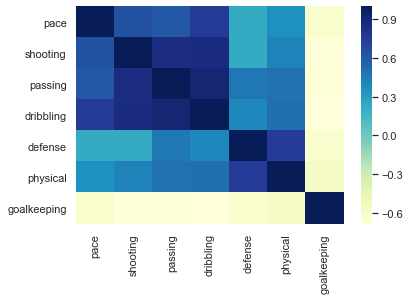

In [12]:
corr_matrix_2 = special_stat.corr()
sns.heatmap(corr_matrix_2, cmap="YlGnBu")